<a href="https://colab.research.google.com/github/Imposon/TETRAPACK/blob/main/TetraPack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Hello there!


In [ ]:
df=pd.read_csv('/content/CRUDE_OIL_DATASET.csv')


In [ ]:
df.shape

(532, 8)

First 10 rows of a DataFrame

In [ ]:
df.head(10)

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Date
208,April,2023,CRUDE OIL,Import,19996.88,89035.98,10841.69,2025-04-26 04:00:34,2023-04-01
235,May,2023,CRUDE OIL,Import,20705.22,87955.31,10689.25,2025-04-26 04:00:34,2023-05-01
262,June,2023,CRUDE OIL,Import,19879.17,83881.45,10197.88,2025-04-26 04:00:34,2023-06-01
289,July,2023,CRUDE OIL,Import,19507.58,85329.77,10360.67,2025-04-26 04:00:34,2023-07-01
316,August,2023,CRUDE OIL,Import,19090.55,91863.74,11089.75,2025-04-26 04:00:34,2023-08-01
343,September,2023,CRUDE OIL,Import,17502.26,90379.19,10879.00,2025-04-26 04:00:34,2023-09-01
370,October,2023,CRUDE OIL,Import,18729.10,98715.18,11859.44,2025-04-26 04:00:34,2023-10-01
397,November,2023,CRUDE OIL,Import,18593.11,95382.06,11456.16,2025-04-26 04:00:34,2023-11-01
424,December,2023,CRUDE OIL,Import,19683.29,94748.46,11383.67,2025-04-26 04:00:34,2023-12-01
451,January,2024,CRUDE OIL,Import,21515.21,101338.49,12181.45,2025-04-26 04:00:34,2024-01-01


Concise Summary Of DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 532 non-null    object 
 1   Year                                  532 non-null    int64  
 2   PRODUCTS                              532 non-null    object 
 3   TRADE                                 532 non-null    object 
 4   Quantity (000 Metric Tonnes)          489 non-null    float64
 5   Value in Rupees (Crore)               489 non-null    float64
 6   Value in Dollars (Million US dollar)  489 non-null    float64
 7   date_updated                          532 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 33.4+ KB


 Descriptive Statistics for the numerical columns of a DataFrame.

In [ ]:
df.describe()

,Year,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar)
count,532.000000,489.000000,489.000000,489.000000
mean,2023.543233,3309.092147,15458.694826,1857.170941
std,0.498596,6701.983616,30716.954459,3688.391630
min,2023.000000,0.000000,0.020000,0.000000
25%,2023.000000,54.480000,308.250000,37.550000
50%,2024.000000,375.250000,1640.080000,196.370000
75%,2024.000000,1908.680000,9523.920000,1143.730000
max,2024.000000,26407.210000,129174.880000,15477.590000


Number of missing (null or NaN) values in each column of a DataFrame.



In [ ]:
pd.isnull(df).sum()

,0
Month,0
Year,0
PRODUCTS,0
TRADE,0
Quantity (000 Metric Tonnes),43
Value in Rupees (Crore),43
Value in Dollars (Million US dollar),43
date_updated,0


To filter out rows where the PRODUCTS column matches specific excluded product names (like 'NET IMPORT', 'TOTAL IMPORT', 'TOTAL PRODUCT EXPORT')

In [ ]:
# Step 1: Define products to exclude (including 'TOTAL PRODUCT EXPORT')
excluded_products = ['NET IMPORT', 'TOTAL IMPORT', 'TOTAL PRODUCT EXPORT']

# Step 2: Ensure the product names are stripped of extra spaces and then filter the DataFrame
df_filtered = df[~df['PRODUCTS'].str.strip().isin(excluded_products)]
df_filtered = df[~df['PRODUCTS'].str.upper().str.contains('TOTAL','NET')]

Fills missing values (NaNs) in the numeric columns with the mean of the respective columns

In [ ]:
# For numeric columns
df_filtered['Quantity (000 Metric Tonnes)'].fillna(df['Quantity (000 Metric Tonnes)'].mean(),inplace=True)
df_filtered['Value in Rupees (Crore)'].fillna(df['Value in Rupees (Crore)'].mean(),inplace=True)
df_filtered['Value in Dollars (Million US dollar)'].fillna(df['Value in Dollars (Million US dollar)'].mean(),inplace=True)

 Checking Number of missing (null or NaN) values in each column of a DataFrame.

In [ ]:
pd.isnull(df_filtered).sum()

,0
Month,0
Year,0
PRODUCTS,0
TRADE,0
Quantity (000 Metric Tonnes),0
Value in Rupees (Crore),0
Value in Dollars (Million US dollar),0
date_updated,0


This code groups the filtered data by year and month, counts the number of records in each group, and displays the total number of records (orders) for every month and year combination.

In [ ]:

orders_per_month = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Total Orders')

print(orders_per_month)

    Year      Month  Total Orders
0   2023      April            25
1   2023     August            25
2   2023   December            25
3   2023       July            25
4   2023       June            25
5   2023        May            25
6   2023   November            25
7   2023    October            25
8   2023  September            25
9   2024      April            24
10  2024     August            24
11  2024   February            25
12  2024    January            25
13  2024       July            24
14  2024       June            24
15  2024      March            25
16  2024        May            24
17  2024   November            24
18  2024    October            24
19  2024  September            24


Descriptive Statistics for the numerical columns of a DataFrame.

In [ ]:
df_filtered.describe()

,Year,Value in Rupees (Crore)
count,532.000000,489.000000
mean,2023.543233,15458.694826
std,0.498596,30716.954459
min,2023.000000,0.020000
25%,2023.000000,308.250000
50%,2024.000000,1640.080000
75%,2024.000000,9523.920000
max,2024.000000,129174.880000


A clear bar chart that shows how the number of records (orders) changes over time, month by month.

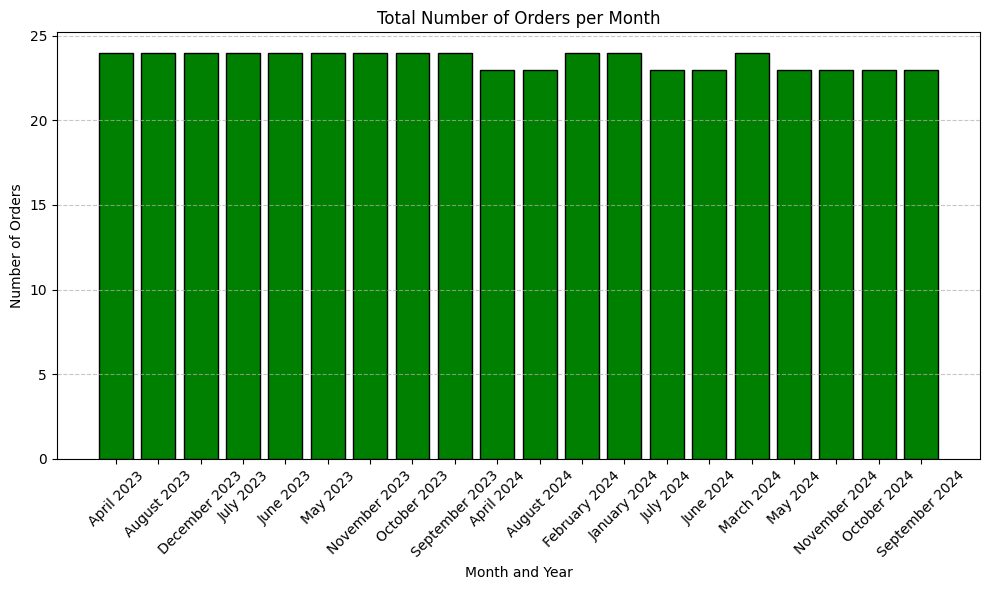

In [ ]:


# Group and count total orders per Year-Month
orders_per_month = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Total Orders')

# Combine Month and Year into a single label column for the x-axis
orders_per_month['Month_Year'] = orders_per_month['Month'] + ' ' + orders_per_month['Year'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(orders_per_month['Month_Year'], orders_per_month['Total Orders'], color='green', edgecolor='black')
plt.title('Total Number of Orders per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


A pie chart visualizing which imported products appear most frequently in the dataset.



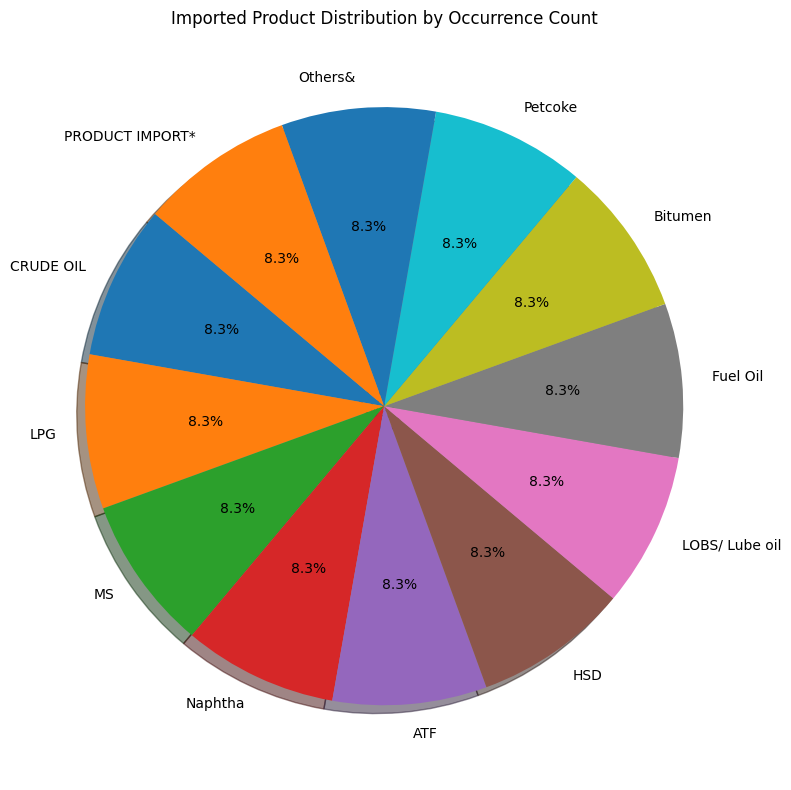

In [ ]:
df_import = df_filtered[df_filtered['TRADE'] == 'Import']

# Step 4: Count occurrences of each product
product_counts = df_import['PRODUCTS'].value_counts()

# Step 5: Plot pie chart
plt.figure(figsize=(10, 8))
product_counts.plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Imported Product Distribution by Occurrence Count')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

A pie chart that visualizes the distribution of exported products in the filtered dataset.

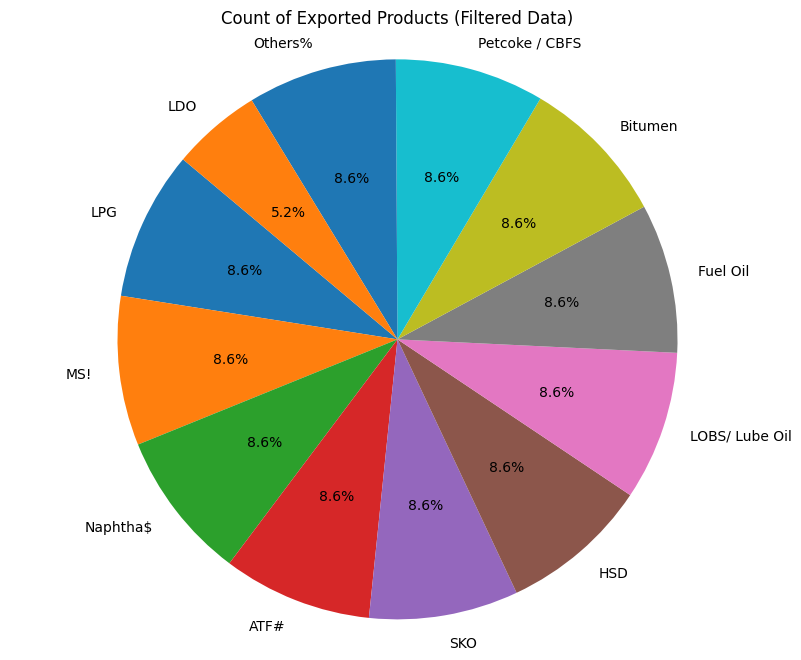

In [ ]:
export_df = df_filtered[df_filtered['TRADE'] == 'Export']

# Step 2: Count how many times each product was exported
product_counts = export_df['PRODUCTS'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Exported Products (Filtered Data)')
plt.axis('equal')
plt.show()

This table helps identify:

Months with unusually high/low imports or exports.

Trends in trade deficits (net imports) over time.

Seasonal patterns in petroleum product trade.

In [ ]:
# Step 1: Group by Year, Month, and Trade Type
grouped = df_filtered.groupby(['Year', 'Month', 'TRADE'])['Value in Rupees (Crore)'].sum().reset_index()

# Step 2: Pivot to have Import and Export in columns
pivot = grouped.pivot_table(index=['Year', 'Month'],
                            columns='TRADE',
                            values='Value in Rupees (Crore)',
                            fill_value=0).reset_index()

# Step 3: Calculate Net Value = Import - Export
pivot['Net Import (₹ Crore)'] = pivot.get('Import', 0) - pivot.get('Export', 0)

# Step 4: View result
print(pivot)


TRADE  Year      Month    Export     Import  Net Import (₹ Crore)
0      2023      April  27417.97  113384.39              85966.42
1      2023     August  40834.23  124125.21              83290.98
2      2023   December  35299.93  128446.71              93146.78
3      2023       July  33918.95  110796.81              76877.86
4      2023       June  28351.42  110817.28              82465.86
5      2023        May  29392.00  119018.03              89626.03
6      2023   November  35730.56  131110.84              95380.28
7      2023    October  30132.90  138722.25             108589.35
8      2023  September  35325.68  124494.20              89168.52
9      2024      April  30933.23  143486.39             112553.16
10     2024     August  28529.52  130819.71             102290.19
11     2024   February  34032.42  119792.13              85759.71
12     2024    January  28664.06  132526.14             103862.08
13     2024       July  30708.65  131524.71             100816.06
14     202

This code creates a time series line plot that shows how the net import (in ₹ Crore) changes each month. It’s useful for identifying trends and anomalies in trade data over time.

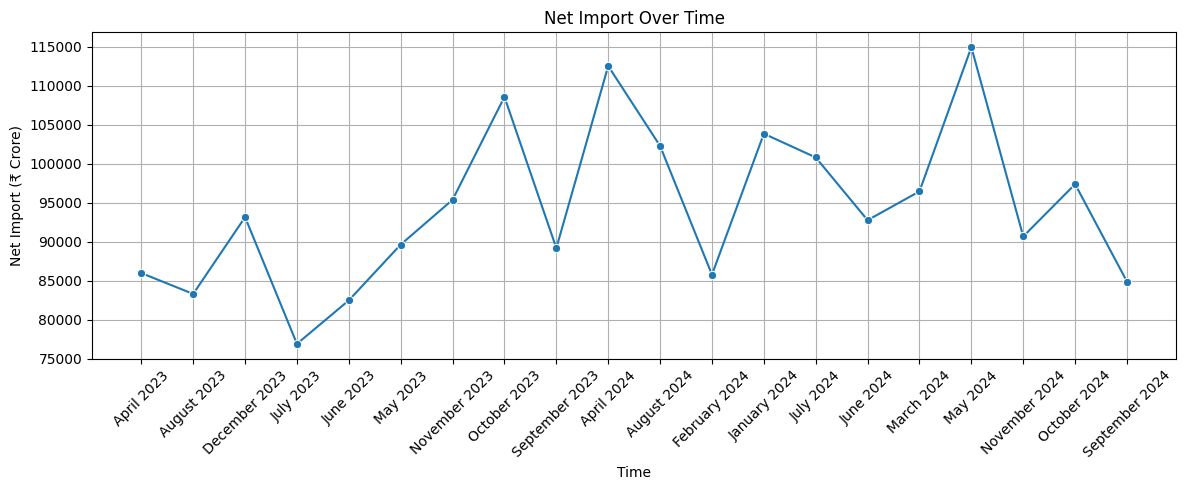

In [ ]:
pivot['Time'] = pivot['Month'] + " " + pivot['Year'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=pivot, x='Time', y='Net Import (₹ Crore)', marker='o')
plt.title('Net Import Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This plot helps visualize the relationship between imports and exports over time, and shows how this relationship may differ between years. It can also help spot months with unusually high or low import/export values.

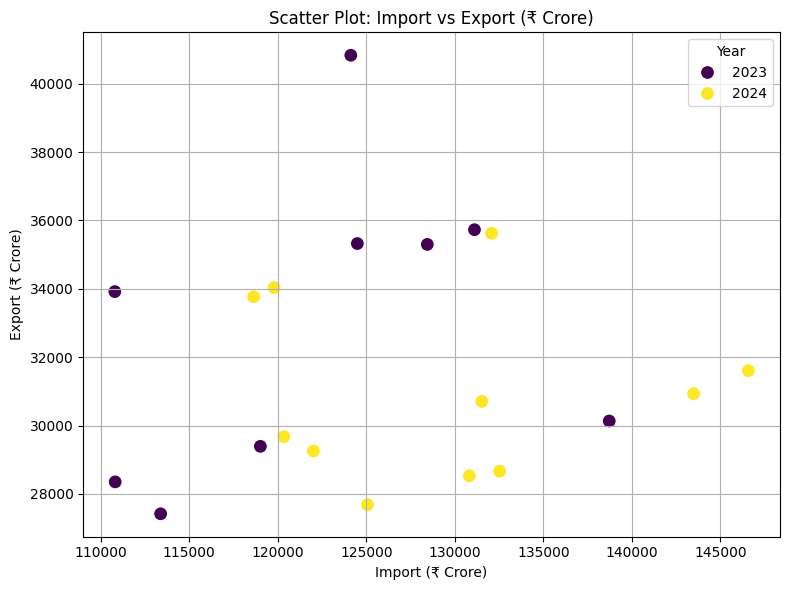

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pivot, x='Import', y='Export', hue='Year', palette='viridis', s=100)
plt.title('Scatter Plot: Import vs Export (₹ Crore)')
plt.xlabel('Import (₹ Crore)')
plt.ylabel('Export (₹ Crore)')
plt.grid(True)
plt.tight_layout()
plt.show()

This code produces a heatmap that makes it easy to compare net import values across different months and years at a glance.

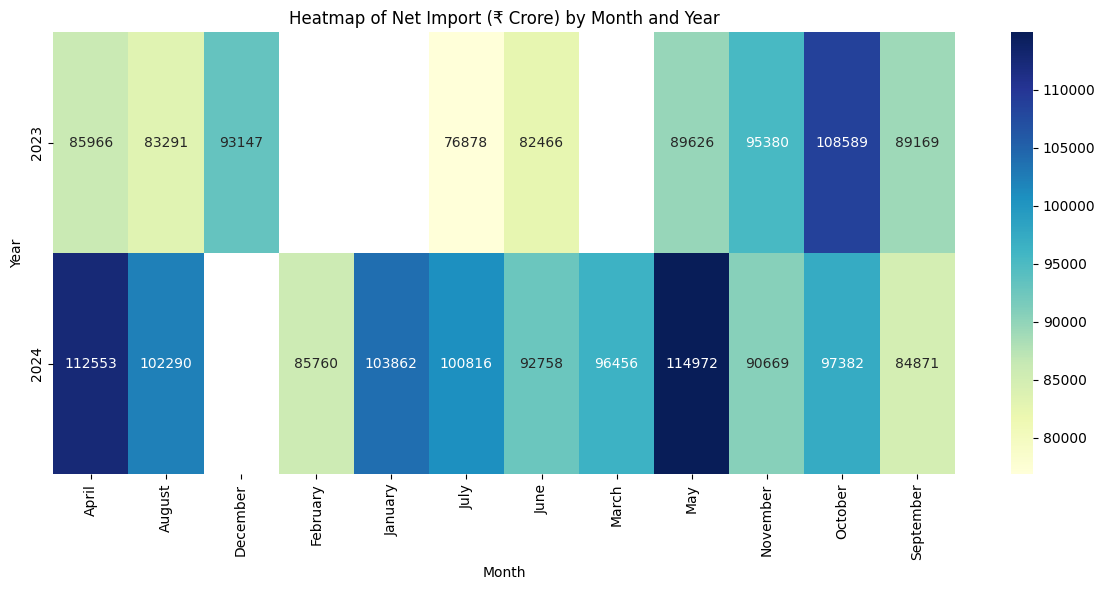

In [ ]:

heatmap_data = pivot.pivot(index='Year', columns='Month', values='Net Import (₹ Crore)')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Net Import (₹ Crore) by Month and Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


Below code cleans and analyzes a filtered crude oil dataset by first converting key numeric columns to proper numeric types and filling any missing values with their column means. It then detects outliers in each of these columns—Quantity, Value in Rupees, and Value in Dollars—using the Interquartile Range (IQR) method, which identifies values significantly lower or higher than the central 50% of the data. All detected outliers are combined, duplicates removed, and the result exported to a CSV file. Finally, for each numeric column, the code generates a boxplot grouped by trade type (Import/Export) with the outliers highlighted as red dots, providing clear visual insight into anomalies in the dataset.

✅ Exported: crude_oil_outliers_filtered.csv


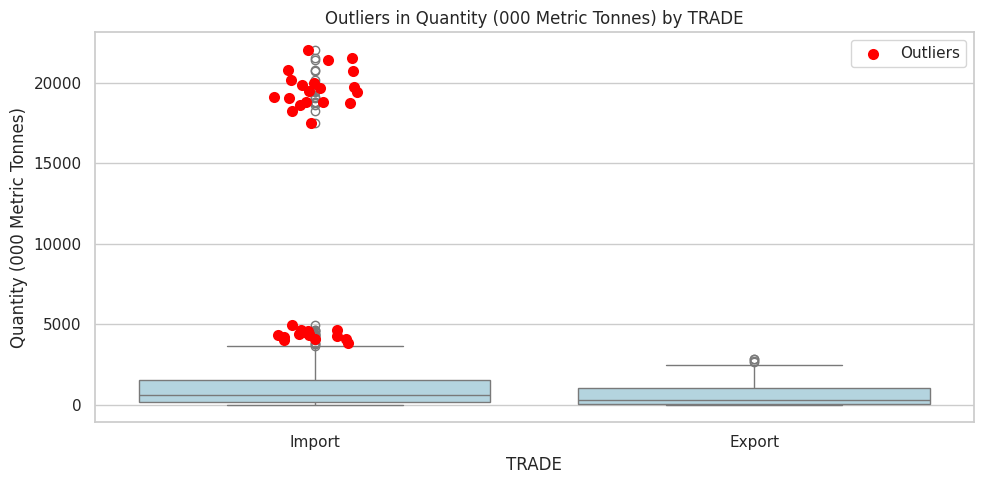

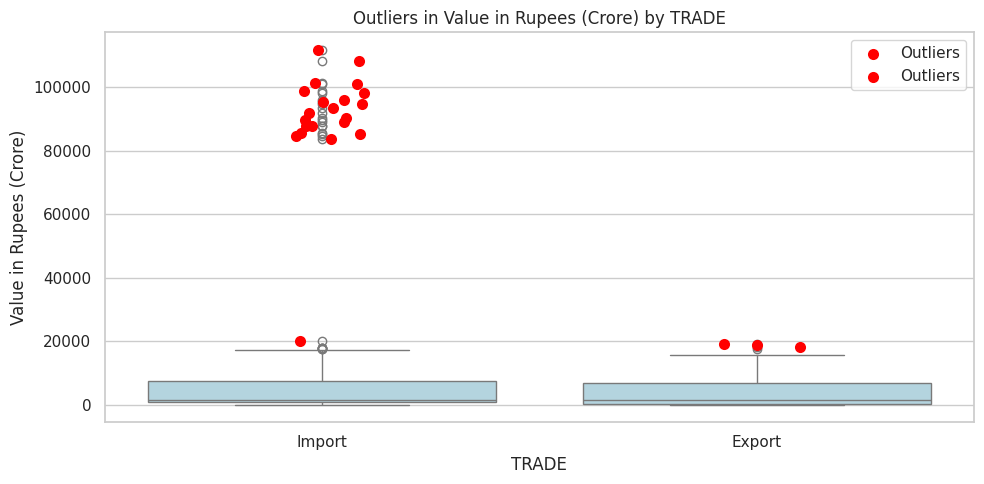

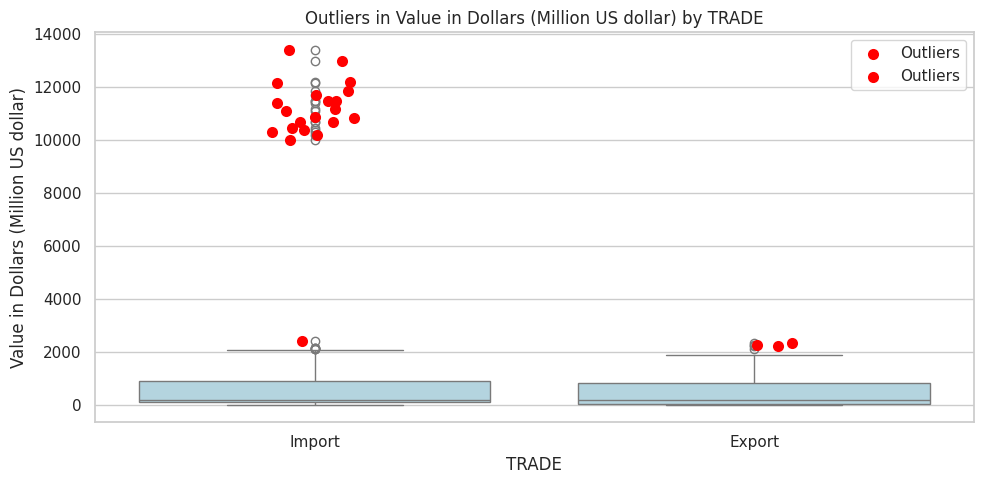

In [ ]:

# Fill missing values in numeric columns with mean
numeric_columns = [
    'Quantity (000 Metric Tonnes)',
    'Value in Rupees (Crore)',
    'Value in Dollars (Million US dollar)'
]
for col in numeric_columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')  # Ensure numeric type
    df_filtered[col].fillna(df_filtered[col].mean(), inplace=True)

# Function to detect outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# Detect outliers
outliers_list = []
for col in numeric_columns:
    outliers = find_outliers_iqr(df_filtered, col)
    outliers['Outlier_Column'] = col
    outliers_list.append(outliers)

# Combine and drop duplicates
outliers_combined = pd.concat(outliers_list).drop_duplicates()

# Export to CSV (for Google Colab use)
outliers_combined.to_csv('/content/crude_oil_outliers_filtered.csv', index=False)
print("✅ Exported: crude_oil_outliers_filtered.csv")

# ---- 📊 Plotting ----
sns.set(style="whitegrid")

for col in numeric_columns:
    col_outliers = outliers_combined[outliers_combined['Outlier_Column'] == col]

    plt.figure(figsize=(10, 5))
    sns.boxplot(x='TRADE', y=col, data=df_filtered, color='lightblue')
    sns.stripplot(x='TRADE', y=col, data=col_outliers, color='red', size=8, jitter=True, label='Outliers')
    plt.title(f'Outliers in {col} by TRADE')
    plt.xlabel('TRADE')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

Below code processes trade data by cleaning and aggregating it. It converts the "Value in Rupees (Crore)" column to numeric, filling missing values with the mean. The data is grouped by month, year, and trade type (import/export), then pivoted to separate imports and exports into distinct columns. The months are reordered chronologically, and the data is sorted by year and month. A combined "Month-Year" label is created for the x-axis. Finally, the code plots the total imports and exports over time, using markers for clarity, with labels, a title, and grid lines for better readability and comparison.










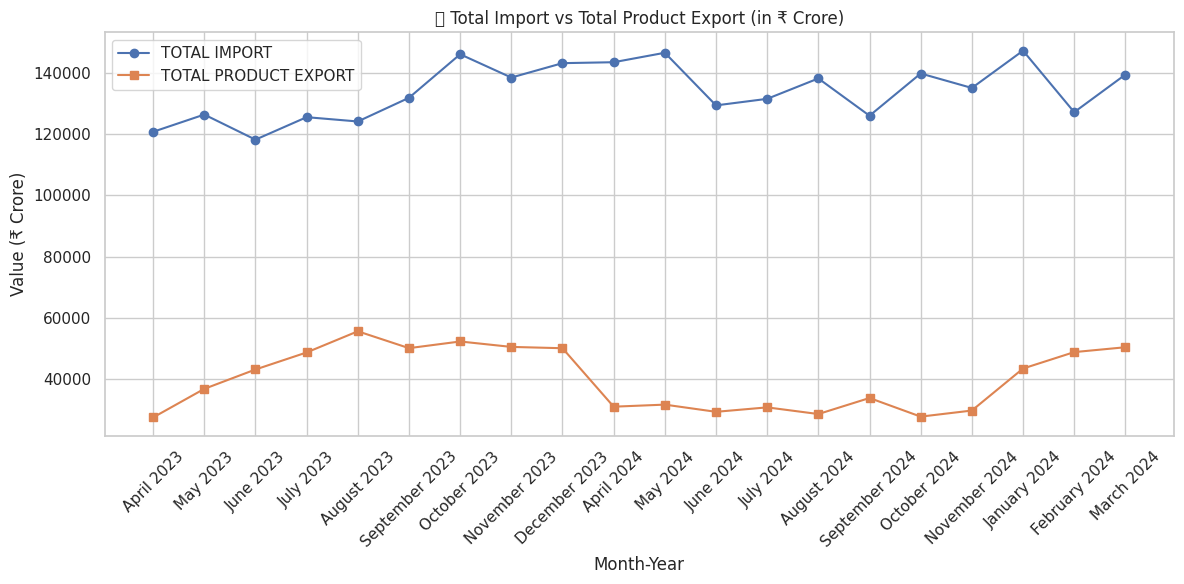

In [ ]:
# Ensure numeric column for aggregation
df_filtered['Value in Rupees (Crore)'] = pd.to_numeric(df_filtered['Value in Rupees (Crore)'], errors='coerce')
df_filtered['Value in Rupees (Crore)'].fillna(df_filtered['Value in Rupees (Crore)'].mean(), inplace=True)

# Group and sum value by Month and Trade
df_grouped = df_filtered.groupby(['Month', 'Year', 'TRADE'])['Value in Rupees (Crore)'].sum().reset_index()

# Pivot to get Import and Export in columns
df_pivot = df_grouped.pivot_table(index=['Month', 'Year'], columns='TRADE', values='Value in Rupees (Crore)', fill_value=0).reset_index()

# Rename columns for clarity
df_pivot.rename(columns={'Import': 'TOTAL IMPORT', 'Export': 'TOTAL PRODUCT EXPORT'}, inplace=True)

# Order months and sort
month_order = ['April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December', 'January', 'February', 'March']
df_pivot['Month'] = pd.Categorical(df_pivot['Month'], categories=month_order, ordered=True)
df_pivot.sort_values(['Year', 'Month'], inplace=True)

# Create a combined label for x-axis
df_pivot['Month-Year'] = df_pivot['Month'].astype(str) + ' ' + df_pivot['Year'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_pivot['Month-Year'], df_pivot['TOTAL IMPORT'], label='TOTAL IMPORT', marker='o')
plt.plot(df_pivot['Month-Year'], df_pivot['TOTAL PRODUCT EXPORT'], label='TOTAL PRODUCT EXPORT', marker='s')

plt.xticks(rotation=45)
plt.title('📈 Total Import vs Total Product Export (in ₹ Crore)')
plt.xlabel('Month-Year')
plt.ylabel('Value (₹ Crore)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Point-wise summary of what below code does:

Data Preparation
Filters Columns: Keeps only Month, Year, TRADE, and Value in Rupees (Crore).

Groups Data: Aggregates import/export values by month, year, and trade type.

Pivots Data: Reshapes the data to show TOTAL IMPORT and TOTAL PRODUCT EXPORT as separate columns.

Orders Months: Ensures months follow a logical order (April → March).

Creates Metrics:

TRADE BALANCE: Export value minus Import value (surplus/deficit).

EXPORT/IMPORT (%): Ratio of exports to imports as a percentage.

Visualizations
Line Chart: Compares monthly total import vs. export values over time.

Bar Chart: Shows monthly import and export values side by side.

Trade Balance Bar Plot: Highlights surplus/deficit for each month (red = deficit, blue = surplus).

Export/Import Ratio Line Plot: Tracks the percentage ratio of exports to imports, with a breakeven line at 100%.

Statistics & Highlights
Prints Summary Stats: Monthly import, export, balance, and ratio values.

Identifies Key Events:

Month with highest import/export.

Month with highest surplus/deficit.

Purpose
Analyze monthly trade trends in petroleum products.

Visualize trade imbalances and export/import ratios.

Identify months with unusual activity (e.g., extreme deficits).

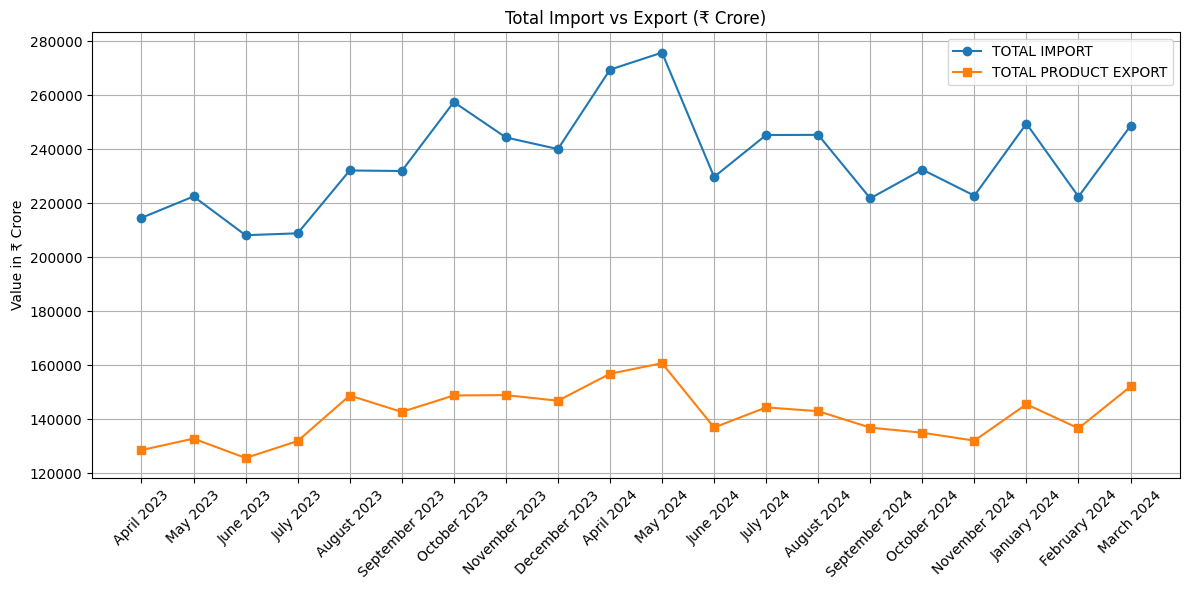

<Figure size 1200x600 with 0 Axes>

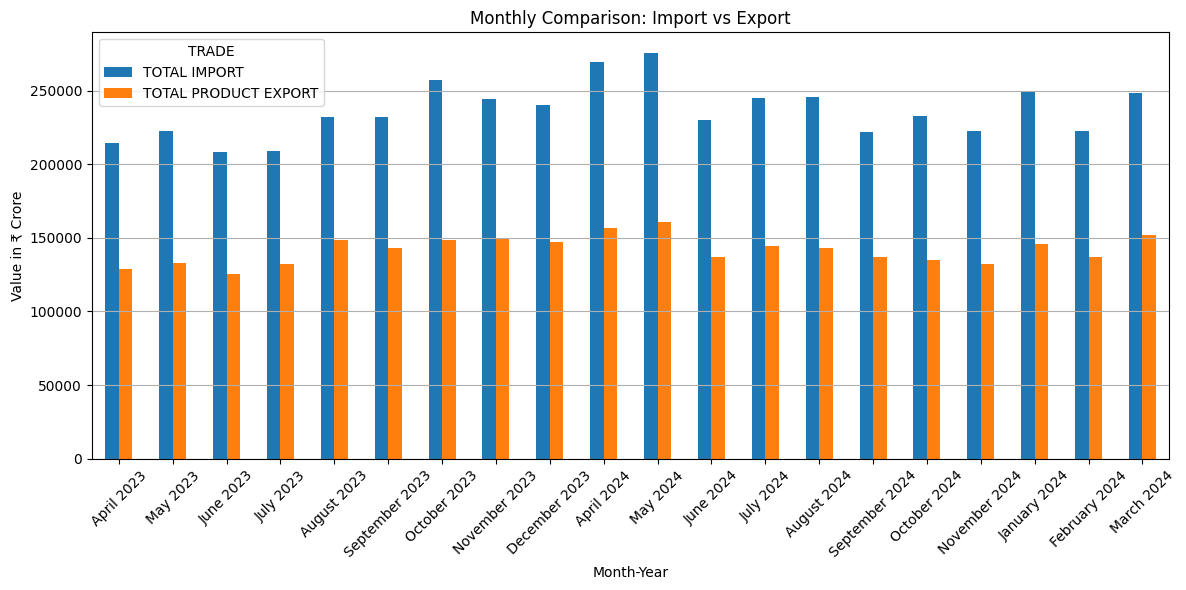

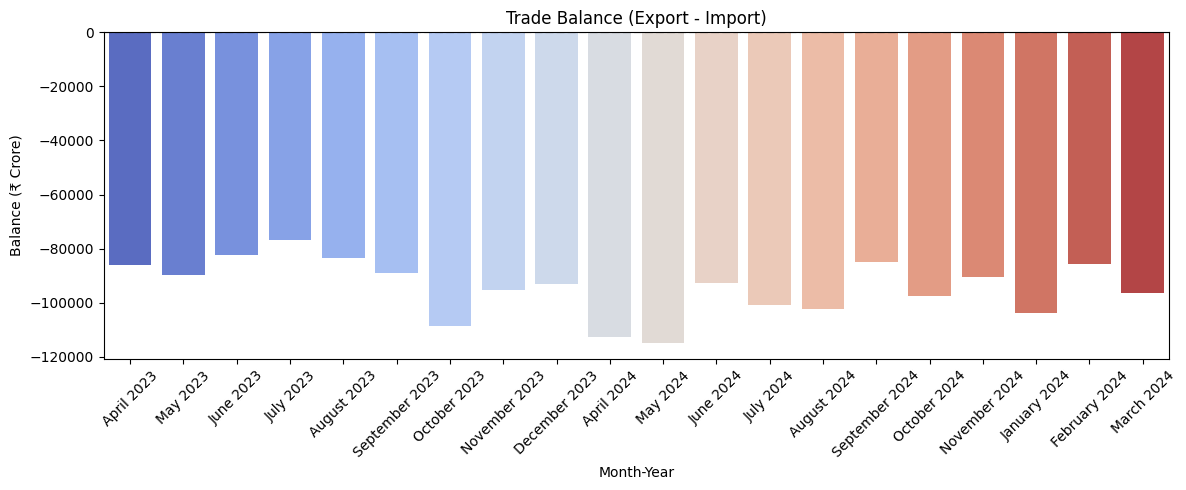

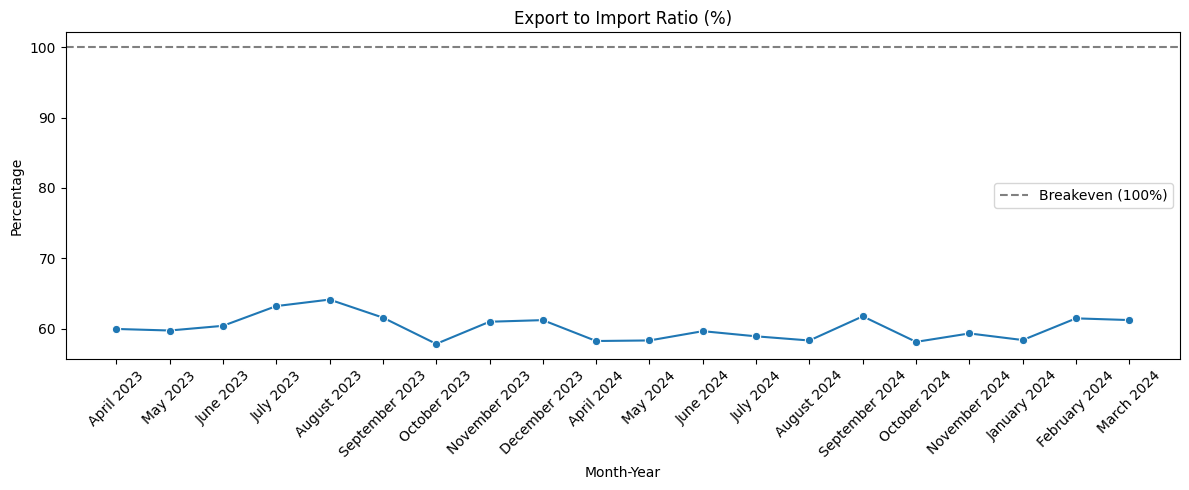


📊 Summary Statistics:

TRADE      Month-Year  TOTAL IMPORT  TOTAL PRODUCT EXPORT  TRADE BALANCE  \
0          April 2023     214594.57             128628.15      -85966.42   
12           May 2023     222504.70             132878.66      -89626.04   
9           June 2023     208166.64             125700.78      -82465.86   
7           July 2023     208860.10             131982.24      -76877.86   
2         August 2023     232119.68             148828.70      -83290.98   
18     September 2023     231930.89             142762.37      -89168.52   
16       October 2023     257440.96             148851.61     -108589.35   
14      November 2023     244357.28             148977.00      -95380.28   
4       December 2023     240044.29             146897.51      -93146.78   
1          April 2024     269441.25             156888.10     -112553.15   
13           May 2024     275753.15             160780.67     -114972.48   
10          June 2024     229748.64             136990.39      -

In [ ]:

# 1. Filter necessary columns
df_filtered = df[['Month', 'Year', 'TRADE', 'Value in Rupees (Crore)']].copy()

# 2. Group by Month, Year and TRADE
df_grouped = df_filtered.groupby(['Month', 'Year', 'TRADE'])['Value in Rupees (Crore)'].sum().reset_index()

# 3. Pivot the data to wide format
df_pivot = df_grouped.pivot(index=['Month', 'Year'], columns='TRADE', values='Value in Rupees (Crore)').fillna(0)
df_pivot.rename(columns={'Import': 'TOTAL IMPORT', 'Export': 'TOTAL PRODUCT EXPORT'}, inplace=True)
df_pivot.reset_index(inplace=True)

# 4. Order months correctly
month_order = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']
df_pivot['Month'] = pd.Categorical(df_pivot['Month'], categories=month_order, ordered=True)
df_pivot.sort_values(['Year', 'Month'], inplace=True)

# 5. Create Month-Year label
df_pivot['Month-Year'] = df_pivot['Month'].astype(str) + ' ' + df_pivot['Year'].astype(str)

# 6. Calculate trade balance and ratio
df_pivot['TRADE BALANCE'] = df_pivot['TOTAL PRODUCT EXPORT'] - df_pivot['TOTAL IMPORT']
df_pivot['EXPORT/IMPORT (%)'] = (df_pivot['TOTAL PRODUCT EXPORT'] / df_pivot['TOTAL IMPORT']) * 100

# ========== PLOTS ==========

# 7. Line chart: Total Import vs Export
plt.figure(figsize=(12, 6))
plt.plot(df_pivot['Month-Year'], df_pivot['TOTAL IMPORT'], label='TOTAL IMPORT', marker='o')
plt.plot(df_pivot['Month-Year'], df_pivot['TOTAL PRODUCT EXPORT'], label='TOTAL PRODUCT EXPORT', marker='s')
plt.title('Total Import vs Export (₹ Crore)')
plt.xticks(rotation=45)
plt.ylabel('Value in ₹ Crore')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Bar chart: Trade comparison
plt.figure(figsize=(12, 6))
df_pivot.set_index('Month-Year')[['TOTAL IMPORT', 'TOTAL PRODUCT EXPORT']].plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Comparison: Import vs Export')
plt.ylabel('Value in ₹ Crore')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# 9. Trade balance (positive = surplus, negative = deficit)
plt.figure(figsize=(12, 5))
sns.barplot(x='Month-Year', y='TRADE BALANCE', data=df_pivot, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Trade Balance (Export - Import)')
plt.xticks(rotation=45)
plt.ylabel('Balance (₹ Crore)')
plt.tight_layout()
plt.show()

# 10. Export/Import ratio
plt.figure(figsize=(12, 5))
sns.lineplot(x='Month-Year', y='EXPORT/IMPORT (%)', data=df_pivot, marker='o')
plt.title('Export to Import Ratio (%)')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.axhline(100, color='gray', linestyle='--', label='Breakeven (100%)')
plt.legend()
plt.tight_layout()
plt.show()

# ========== STATISTICS ==========

print("\n📊 Summary Statistics:\n")
print(df_pivot[['Month-Year', 'TOTAL IMPORT', 'TOTAL PRODUCT EXPORT', 'TRADE BALANCE', 'EXPORT/IMPORT (%)']])

print("\n🚨 Key Highlights:")
print(f"- Max Import Month: {df_pivot.loc[df_pivot['TOTAL IMPORT'].idxmax(), 'Month-Year']}")
print(f"- Max Export Month: {df_pivot.loc[df_pivot['TOTAL PRODUCT EXPORT'].idxmax(), 'Month-Year']}")
print(f"- Highest Trade Surplus: {df_pivot.loc[df_pivot['TRADE BALANCE'].idxmax(), 'Month-Year']}")
print(f"- Highest Trade Deficit: {df_pivot.loc[df_pivot['TRADE BALANCE'].idxmin(), 'Month-Year']}")


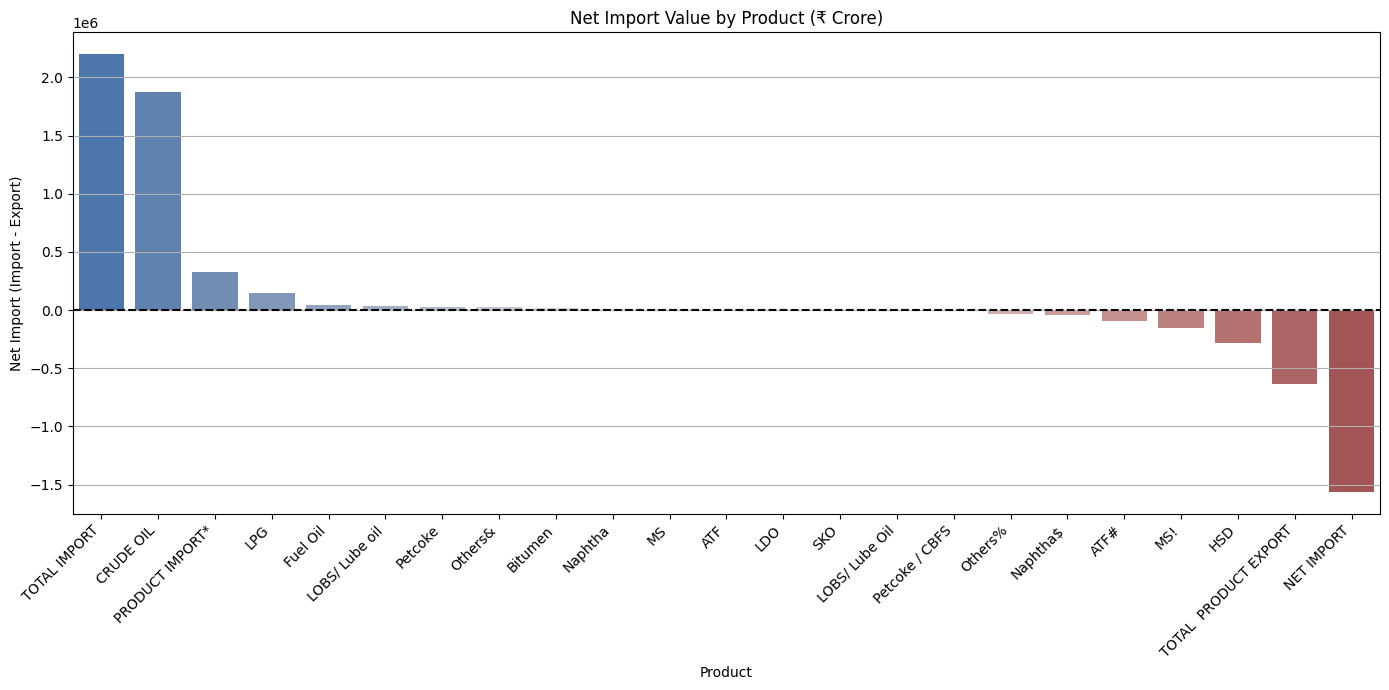

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by PRODUCTS and TRADE, summing values
product_trade_sum = df.groupby(['PRODUCTS', 'TRADE'])['Value in Rupees (Crore)'].sum().unstack(fill_value=0)

# Step 2: Calculate net import (Import - Export)
product_trade_sum['NET IMPORT (₹ Cr)'] = product_trade_sum.get('Import', 0) - product_trade_sum.get('Export', 0)

# Step 3: Sort values for better visualization
product_trade_sum_sorted = product_trade_sum.sort_values(by='NET IMPORT (₹ Cr)', ascending=False)

# Step 4: Plot histogram (bar chart)
plt.figure(figsize=(14, 7))
sns.barplot(
    x=product_trade_sum_sorted.index,
    y=product_trade_sum_sorted['NET IMPORT (₹ Cr)'],
    palette='vlag'
)
plt.axhline(0, color='black', linestyle='--')
plt.title('Net Import Value by Product (₹ Crore)')
plt.ylabel('Net Import (Import - Export)')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


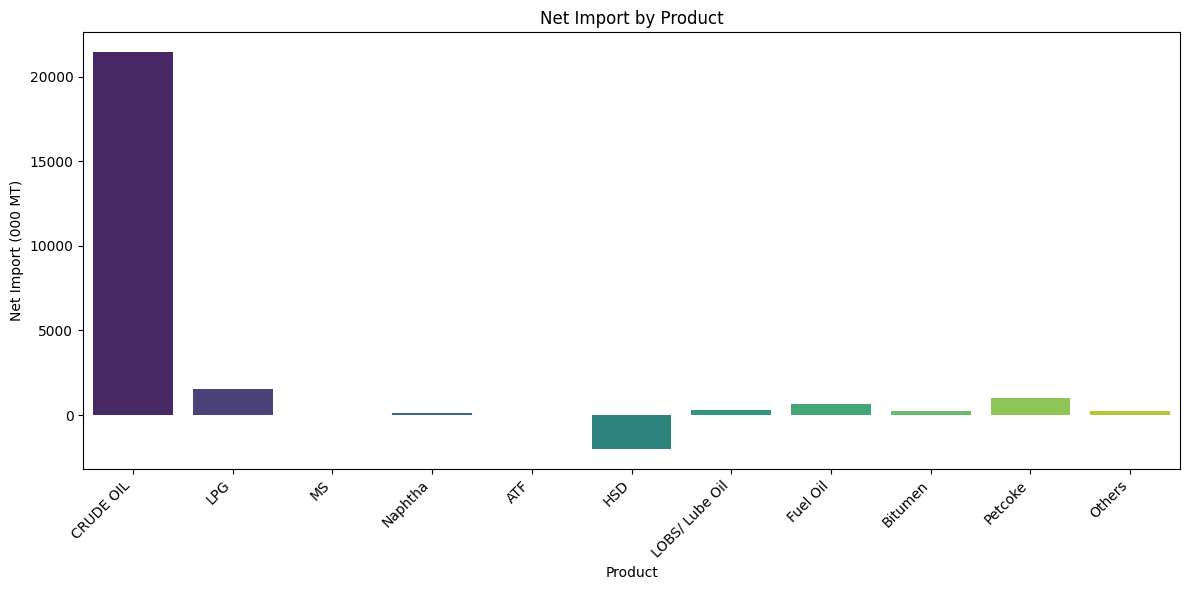

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace this with your actual data loading and processing if needed
data = {
    'Product': ['CRUDE OIL', 'LPG', 'MS', 'Naphtha', 'ATF', 'HSD', 'LOBS/ Lube Oil', 'Fuel Oil', 'Bitumen', 'Petcoke', 'Others'],
    'Net_Import': [21439.18, 1526.29, 29.99, 121.22, 0.00, -1997.03, 284.54, 667.90, 270.85, 1026.11, 215.47]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Net_Import', data=df, palette='viridis')
plt.title('Net Import by Product')
plt.xlabel('Product')
plt.ylabel('Net Import (000 MT)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



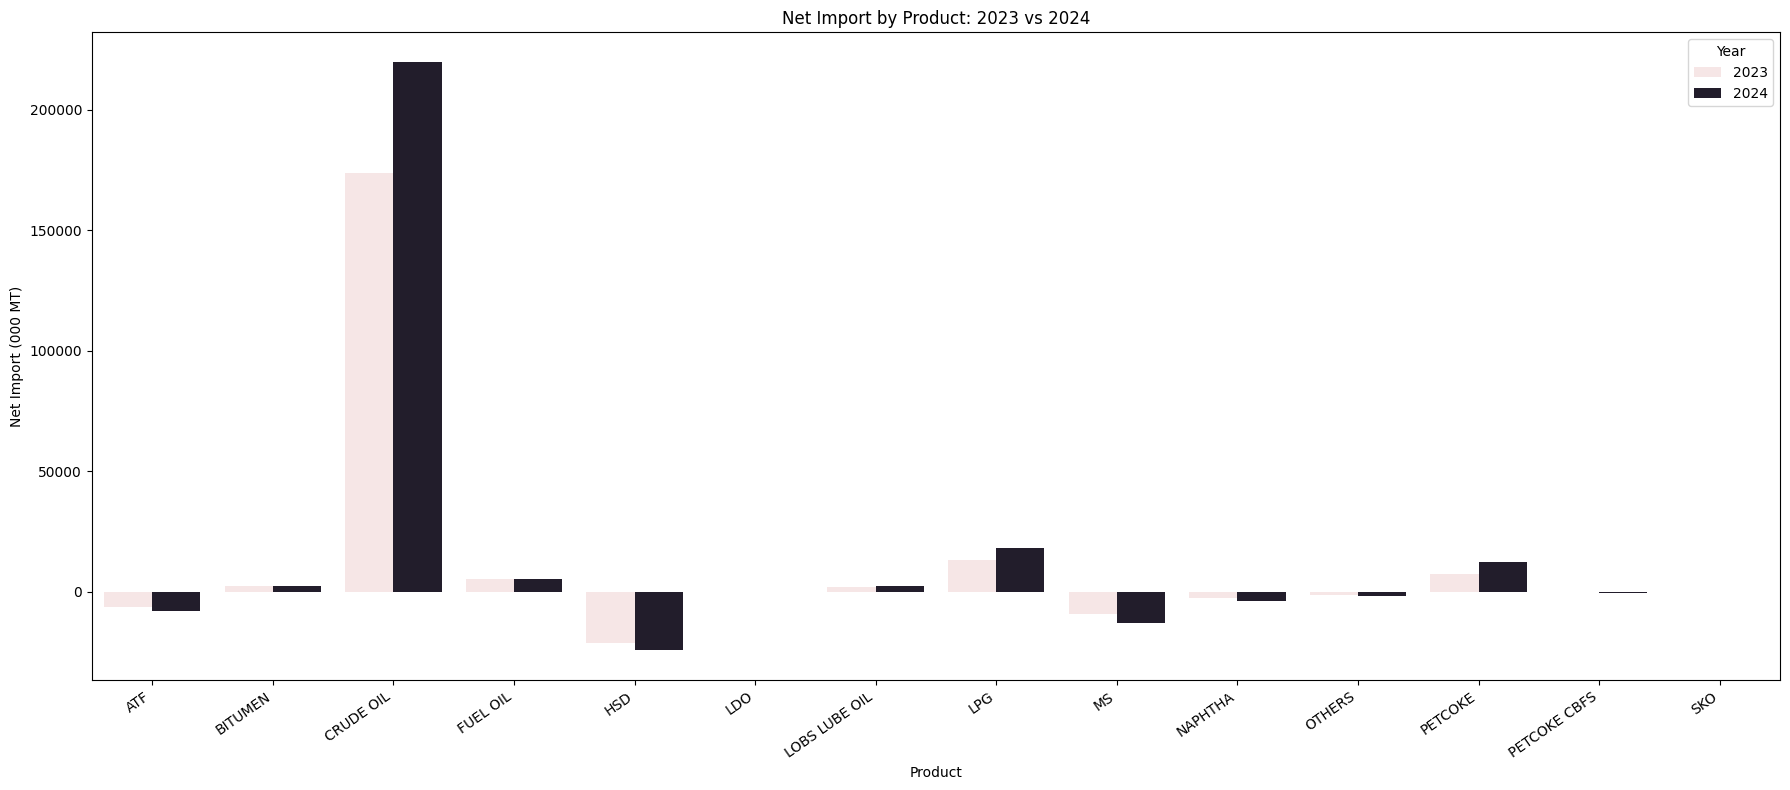

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('CRUDE_OIL_DATASET.csv')

# Clean product names for grouping
def clean_product(product):
    return (str(product)
            .replace('&', '').replace('%', '').replace('!', '')
            .replace('#', '').replace('$', '').replace('*', '')
            .replace('/', '').replace('  ', ' ')
            .replace('oil', 'Oil').replace('OIL', 'OIL')
            .replace('lube', 'Lube').replace('Lube', 'Lube')
            .replace('LOBS', 'LOBS').strip().upper())

df['PRODUCT_CLEAN'] = df['PRODUCTS'].apply(clean_product)

# Remove summary/total rows
summary_keywords = ['TOTAL', 'NET', 'PRODUCT IMPORT*']
mask = ~df['PRODUCTS'].str.upper().str.contains('|'.join(summary_keywords))
df_clean = df[mask].copy()

# Group by Year, Product, Trade and sum
grouped = (
    df_clean.groupby(['Year', 'PRODUCT_CLEAN', 'TRADE'])['Quantity (000 Metric Tonnes)']
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)

# Calculate Net Import (Import - Export)
grouped['Net Import'] = grouped.get('Import', 0) - grouped.get('Export', 0)

# Plot
plt.figure(figsize=(18,8))
sns.barplot(
    x='PRODUCT_CLEAN', y='Net Import', hue='Year',
    data=grouped, palette=['#f9e3e3', '#211a2e']
)
plt.title('Net Import by Product: 2023 vs 2024')
plt.xlabel('Product')
plt.ylabel('Net Import (000 MT)')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()


This code detects and highlights months with unusually high or low crude oil import quantities by applying STL decomposition and flagging anomalies in the residuals that exceed three standard deviations.



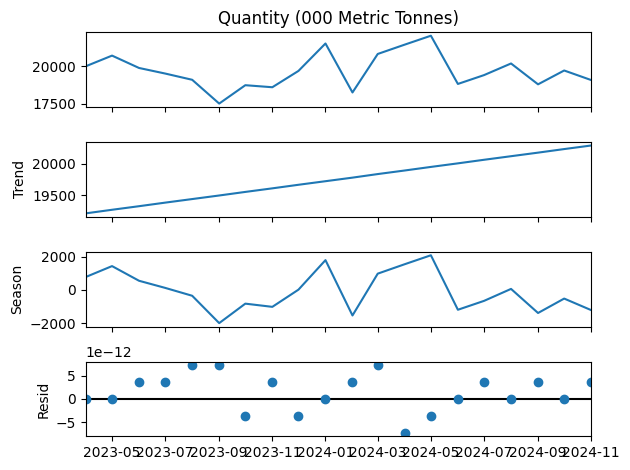

Anomaly months: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
#Anamoly

# Load and prepare your time series (example for CRUDE OIL import)
df = pd.read_csv('CRUDE_OIL_DATASET.csv')
df = df[df['PRODUCTS'] == 'CRUDE OIL']
df = df[df['TRADE'] == 'Import']
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df = df.sort_values('Date')
series = df.set_index('Date')['Quantity (000 Metric Tonnes)']

# STL decomposition
stl = STL(series, seasonal=13)
result = stl.fit()
result.plot()
plt.show()

# Flag anomalies in the residual
resid = result.resid
threshold = 3 * resid.std()
anomalies = resid[abs(resid) > threshold]
print("Anomaly months:", anomalies.index)


This code analyzes whether numerical data follows Benford's Law, which predicts the distribution of leading digits (1-9) in naturally occurring datasets.

In [ ]:
def leading_digit(series):
    return series[series > 0].apply(lambda x: int(str(x)[0]))

In [ ]:
def plot_benford(data, title):
    benford_dist = np.log10(1 + 1 / np.arange(1, 10))
    leads = leading_digit(data)
    counts = leads.value_counts(normalize=True).sort_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts.index, y=counts.values, color='skyblue', label='Observed')
    plt.plot(range(1, 10), benford_dist, color='red', marker='o', label='Benford')
    plt.title(f"Benford's Law - {title}")
    plt.xlabel("Leading Digit")
    plt.ylabel("Proportion")
    plt.legend()
    plt.tight_layout()
    plt.show()

Step-by-step summary of what below code does:

1. Key Functions
get_leading_digit(series)
Purpose: Extracts leading digits (1-9) from numeric data.

Steps:

Converts numbers to strings and removes non-digit characters (e.g., commas, symbols).

Strips leading zeros (e.g., "0123" becomes "123").

Extracts the first digit (ignores empty/zero-only values).

Filters to retain only digits 1-9.

plot_benford(data, title, ax)
Purpose: Compares actual leading digit distribution to Benford's Law.

Steps:

Uses get_leading_digit to extract leading digits from data.

Computes actual frequencies of digits 1-9.

Defines Benford's Law theoretical frequencies (log10(1 + 1/d)).

Plots:

Bar chart: Actual frequencies (blue bars).

Line plot: Benford's expected frequencies (red line).

2. Main Analysis
Grid of Subplots (3x3)
Rows:

Quantity Analysis:

Total, Export, Import quantities.

Rupee Value Analysis:

Total, Export, Import values in ₹ Crore.

Dollar Value Analysis:

Total, Export, Import values in $ Million.

Columns:

Total, Export, Import (one subplot per column).

Combined Histogram
Compares leading digit distributions for:

Rupee values (₹ Crore).

Dollar values ($ Million).

Overlays Benford's Law (scaled to match counts).

3. Key Outputs
9 Subplots:

Each compares actual vs. Benford's Law for a specific metric (e.g., Import Quantity, Export Dollar Value).

Combined Histogram:

Shows leading digit counts for rupee/dollar values with Benford's reference line.

4. Purpose
Benford's Law Analysis:

Detects anomalies in numerical datasets (e.g., fabricated or manipulated data).

Natural datasets (e.g., trade volumes, financial values) often follow Benford's distribution.

Deviations from Benford's Law may indicate data quality issues or fraud.

5. Example Use Case
If Import Quantity data shows a spike in leading digit 7 (uncommon in Benford's Law), this could flag potential data entry errors or irregularities.

6. Technical Notes
Handling Missing Data: Uses .dropna() to exclude missing values.

Visual Clarity:

Bars (blue) = Actual data.

Red line = Benford's expected pattern.

Grid layout organizes analysis by metric and trade type.

This code provides a systematic way to audit numerical data for compliance with Benford's Law, highlighting potential anomalies in trade quantities and values.

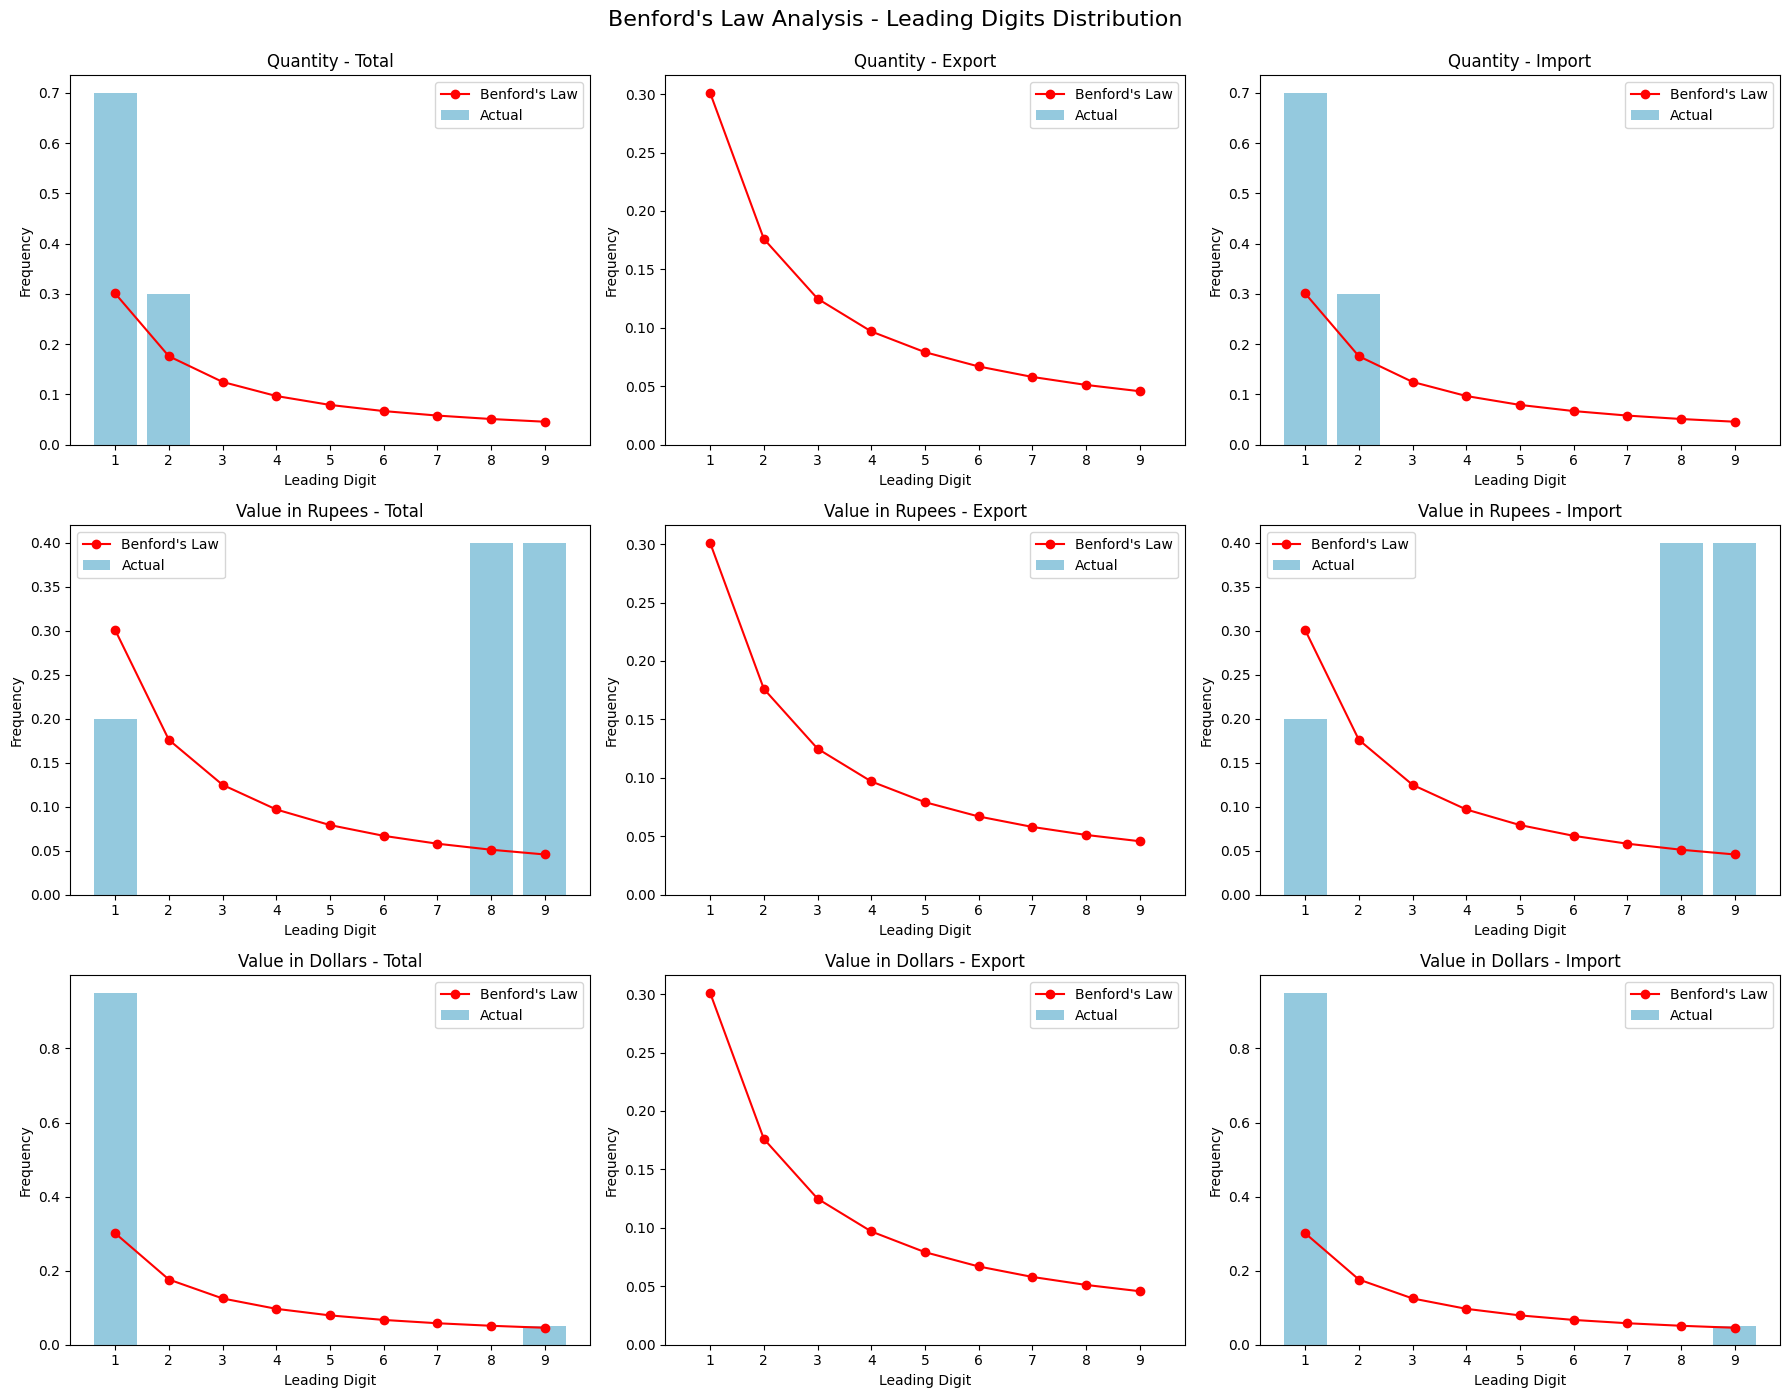

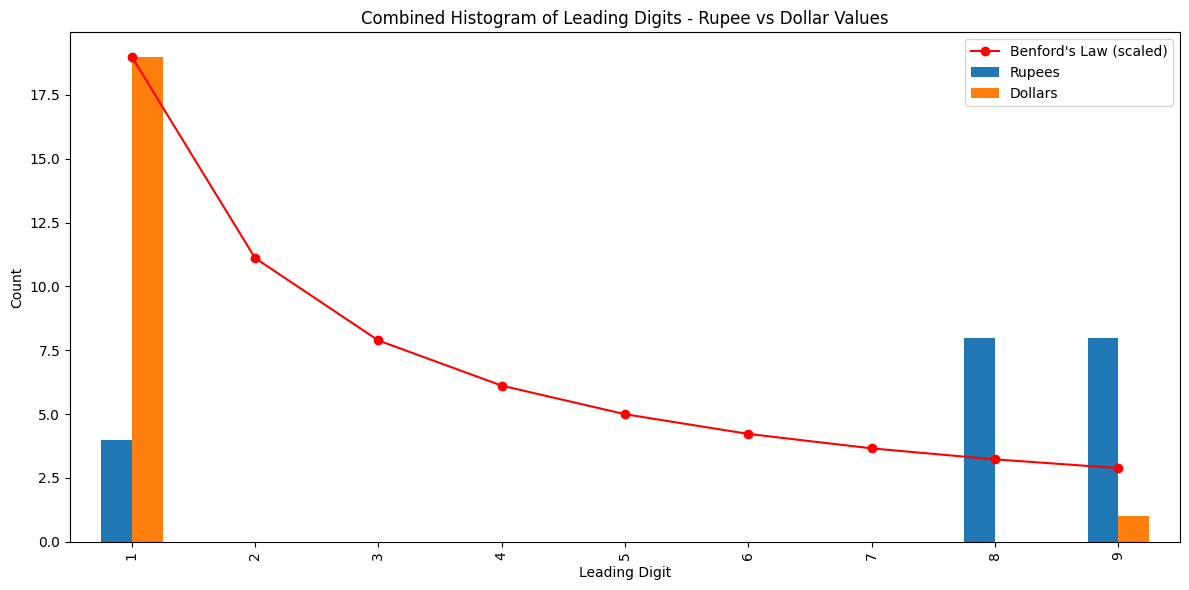

In [ ]:

def get_leading_digit(series):
    """Extract leading digits from a numeric series, ignoring zeros and non-numeric values"""
    # Convert to string, remove non-digits, and strip leading zeros
    leading_digits = series.astype(str).str.replace(r'\D', '', regex=True).str.lstrip('0').str[0]
    # Keep only valid digits 1-9
    leading_digits = leading_digits[leading_digits.isin([str(i) for i in range(1, 10)])].astype(int)
    return leading_digits

def plot_benford(data, title, ax=None):
    """Plot Benford's Law distribution vs actual data"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))

    # Extract first digit
    leading_digits = get_leading_digit(data.dropna())

    # Count actual occurrences
    actual_counts = leading_digits.value_counts().sort_index()
    actual_freq = actual_counts / actual_counts.sum()

    # Get all digits 1-9
    all_digits = pd.Series(range(1, 10))
    # Ensure we have all digits represented (fill missing with zeros)
    actual_freq = actual_freq.reindex(all_digits, fill_value=0)

    # Benford's expected frequencies
    benford_freq = [np.log10(1 + 1/d) for d in range(1, 10)]

    # Plotting
    sns.barplot(x=actual_freq.index, y=actual_freq.values, color='skyblue', label='Actual', ax=ax)
    ax.plot(range(9), benford_freq, color='red', marker='o', label="Benford's Law")
    ax.set_title(title)
    ax.set_xlabel("Leading Digit")
    ax.set_ylabel("Frequency")
    ax.set_xticks(range(9))
    ax.set_xticklabels(range(1, 10))
    ax.legend()
    return ax

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Row 1: Quantity analysis
plot_benford(df_clean['Quantity (000 Metric Tonnes)'], 'Quantity - Total', axes[0, 0])
plot_benford(df_clean[df_clean['TRADE'] == 'Export']['Quantity (000 Metric Tonnes)'], 'Quantity - Export', axes[0, 1])
plot_benford(df_clean[df_clean['TRADE'] == 'Import']['Quantity (000 Metric Tonnes)'], 'Quantity - Import', axes[0, 2])

# Row 2: Rupee value analysis
plot_benford(df_clean['Value in Rupees (Crore)'], 'Value in Rupees - Total', axes[1, 0])
plot_benford(df_clean[df_clean['TRADE'] == 'Export']['Value in Rupees (Crore)'], 'Value in Rupees - Export', axes[1, 1])
plot_benford(df_clean[df_clean['TRADE'] == 'Import']['Value in Rupees (Crore)'], 'Value in Rupees - Import', axes[1, 2])

# Row 3: Dollar value analysis
plot_benford(df_clean['Value in Dollars (Million US dollar)'], 'Value in Dollars - Total', axes[2, 0])
plot_benford(df_clean[df_clean['TRADE'] == 'Export']['Value in Dollars (Million US dollar)'], 'Value in Dollars - Export', axes[2, 1])
plot_benford(df_clean[df_clean['TRADE'] == 'Import']['Value in Dollars (Million US dollar)'], 'Value in Dollars - Import', axes[2, 2])

plt.suptitle("Benford's Law Analysis - Leading Digits Distribution", fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# Creating a combined histogram of leading digits distribution for both currencies
fig, ax = plt.subplots(figsize=(12, 6))

# Get leading digits for both currencies
rupee_leading_digits = get_leading_digit(df_clean['Value in Rupees (Crore)'].dropna())
dollar_leading_digits = get_leading_digit(df_clean['Value in Dollars (Million US dollar)'].dropna())

# Create a DataFrame for easier plotting
hist_data = pd.DataFrame({
    'Rupees': pd.Series(rupee_leading_digits).value_counts().sort_index().reindex(range(1, 10), fill_value=0),
    'Dollars': pd.Series(dollar_leading_digits).value_counts().sort_index().reindex(range(1, 10), fill_value=0)
})

# Plot combined histogram
hist_data.plot(kind='bar', ax=ax)
ax.set_title('Combined Histogram of Leading Digits - Rupee vs Dollar Values')
ax.set_xlabel('Leading Digit')
ax.set_ylabel('Count')
ax.set_xticks(range(9))
ax.set_xticklabels(range(1, 10))
ax.legend(title='Currency')

# Add Benford's distribution line
x = np.arange(9)
benford_freq = [np.log10(1 + 1/d) for d in range(1, 10)]
# Scale benford to make it visible against the counts
scale_factor = max(hist_data.max()) / max(benford_freq)
benford_scaled = [b * scale_factor for b in benford_freq]
ax.plot(x, benford_scaled, 'r-o', label="Benford's Law (scaled)")
ax.legend()

plt.tight_layout()
plt.show()